In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

### The Normal Equation

In [25]:
m = 100
X = 2*np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

In [26]:
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [27]:
line_x = np.linspace(0,2,100)
line_y = theta_best[0] * line_x + theta_best[1]

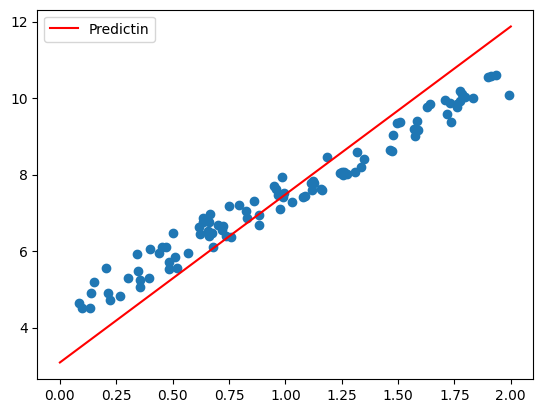

In [34]:
plt.scatter(X, y)
plt.plot(line_x, line_y, "r-", label="Predictin")
plt.legend()

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.39205839]), array([[3.08609759]]))

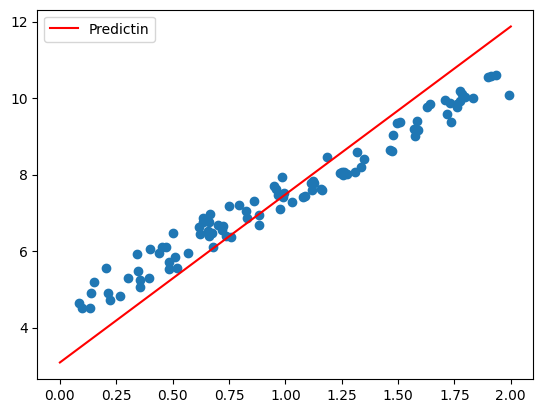

In [39]:
lin_y = lin_reg.predict(line_x.reshape(-1,1))
plt.scatter(X, y)
plt.plot(line_x, line_y, "r-", label="Predictin")
plt.legend()

### Polynomial Regression

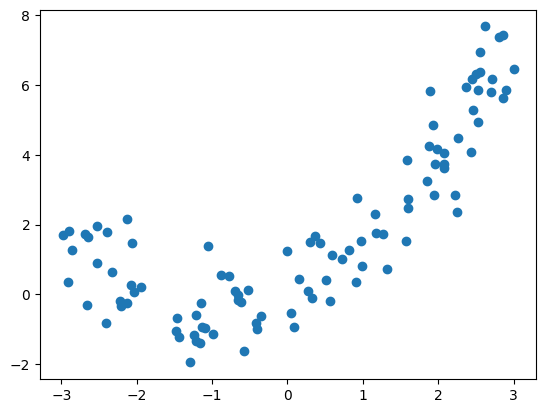

In [43]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + np.random.randn(m, 1)
plt.scatter(X, y)

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]



(array([2.21690959]), array([2.21690959, 4.91468814]))

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_,lin_reg.coef_

(array([-0.0167097]), array([[0.95219668, 0.49909196]]))

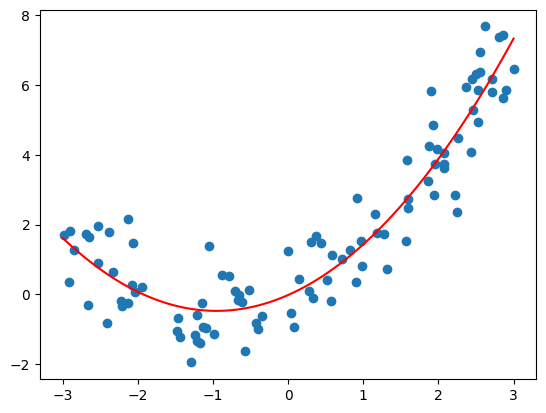

In [64]:
X_line = np.linspace(-3,3,100)
X_line_poly = poly_features.fit_transform(X_line.reshape(-1,1))
y_line = lin_reg.predict(X_line_poly)
plt.scatter(X, y)
plt.plot(X_line, y_line,"r")


#### Learning curve
在不同training size下训练得分和交叉验证得分

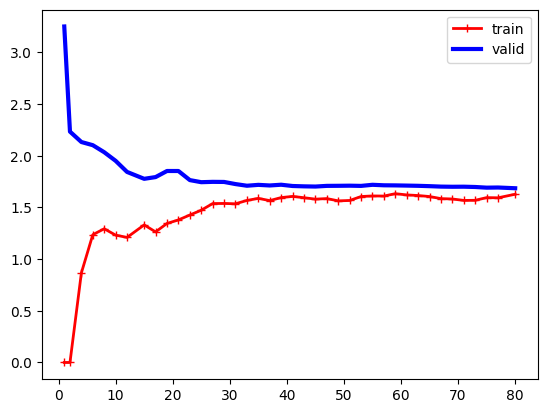

In [70]:
from sklearn.model_selection import learning_curve
train_size, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01,1.0,40), cv=5,scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1) #5个cv的均值
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_size, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_size, valid_errors, "b-", linewidth=3, label="valid")
plt.legend()

In [71]:
train_size

array([ 1,  2,  4,  6,  8, 10, 12, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 80])

In [65]:
np.linspace(0.01, 1.0, 40)

array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ])